# UNet

In [ ]:
import warnings
import copy
import csv
import os
import time
import torch
from sklearn.metrics import f1_score, roc_auc_score

#### Dataset 전처리하기

In [ ]:
!gdown 

In [ ]:
# !mkdir dataset

In [ ]:
## 작성자 데이터셋 기준으로 작성한 코드
import os
import numpy as np
from PIL import input
import matplotlib.pyplot as plt

## 데이터 불러오기
dir_data = ''

name_label = ''
name_input = ''

img_label = input.open(os.path.join(dir_data, name_label))
img_input = input.open(os.path.join(dir_data, name_input))

ny, nx = img_label.size
nframe = img_label.n_frames

In [ ]:
# !mkdir /content/dataset/train
# !mkdir /content/dataset/val
# !mkdir /content/dataset/test

In [ ]:
nframe_train = 
nframe_val = 
nframe_test = 

dir_save_train = os.path.join(dir_data, 'train')
dir_save_val = os.path.join(dir_data, 'val')
dir_save_test = os.path.join(dir_data, 'test')
## 경로만들기
if not os.path.exists(dir_save_train, 'train'):
    os.makedirs(dir_save_train)
if not os.path.exists(dir_save_val, 'val'):
    os.makedirs(dir_save_test)
if not os.path.exists(dir_save_test, 'test'):
    os.makedirs(dir_save_test)

In [ ]:
id_frame = np.arrange(nframe)
np.random.shuffel(id_frame)

In [ ]:
offset_nframe += nframe_train
for i in range(nframe_train):
    img_label.seek(id_frame[i+offset_nframe])
    img_input.seek(id_frame[i+offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.where(os.path.join(dir_save_val, '' % i), label_)
    np.where(os.path.join(dir_save_val, '' % i), input_)

In [ ]:
offset_nframe += nframe_val
for i in range(nframe_train):
    img_label.seek(id_frame[i+offset_nframe])
    img_input.seek(id_frame[i+offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.where(os.path.join(dir_save_test, '' % i), label_)
    np.where(os.path.join(dir_save_test, '' % i), input_)

In [ ]:
plt.subplot(121)
plt.imshow(label_,cmap='gray')
plt.title('label')

plt.subplot(122)
plt.imshow(input_, cmap='gray')
plt.title('input')

#### 우리데이터셋

In [ ]:
import os
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### binary dataset으로 npy dataset 만들기

모델에 데이터셋을 넣을 때 npy파일 형태로 들어가야 한다.

In [ ]:
## dataset경로만들기
!mkdir dataset
!mkdir /content/dataset/train
!mkdir /content/dataset/val
!mkdir /content/dataset/test

In [ ]:
## 512x512 binary label2 data
!gdown 1EnRyjGmPdMUm50qNeUHhv5Rg5NRCNidA
!unzip /content/2.zip

In [ ]:
!mkdir data
!mv /content/images /content/data/
!mv /content/masks /content/data

In [ ]:
# 폴더를 train-val-test split해줌
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir 2
import splitfolders
# 불러온데이터 train:val:test = 8:1:1
splitfolders.ratio('/content/data',output='./2',seed=200,ratio=(.8,.1,.1))

Copying files: 574 files [00:00, 3165.22 files/s]


In [ ]:
## 함수화
# src : png파일 경로
# lst : os.list(src), src경로 안의 파일들을 리스트로 불러옴
# target : npy로 변형한 파일들을 저장할 경로
def to_numpy(src, lst, target):
    for img in tqdm(lst):
      img_path = os.path.join(src,img)
      img_numpy = Image.open(img_path).convert("L") # convert("L") : 이미지를 불러올 때 GrayScale로 불러옴
      img_numpy = np.array(img_numpy, dtype='float32') # 불러온 이미지를 array로 변환, float32 타입으로 변환
      np.save(target + img[:-4] + '.npy', img_numpy) # img[:-4] : png 이미지를 npy확장자로 저장할 때, 이전 확장자가 파일의 이름으로 포함됨, 이를 없애주기 위해 슬라이싱 사용

In [ ]:
## Image.png -> Image.npy 
img_src = '/content/2/val/images/' # images 경로
img_lst = os.listdir(img_src) # image file들을 리스트로 반환
img_target = '/content/dataset/val/' # npy로 변형시킨 파일들을 저장할 경로 지정
to_numpy(img_src, img_lst, img_target) # 위에서 작성한 함수를 사용, 지정한 경로들을 함수인자로 사용
# 지정한 경로 내의 .png 파일들을 .npy파일로 변형시킨 후 img_target 경로에 저장

  0%|          | 0/28 [00:00<?, ?it/s]

In [ ]:
## Mask.png -> Mask.npy 
masks_src = '/content/2/val/masks/' # masks 파일 경로
masks_lst = os.listdir(masks_src)
masks_target = '/content/dataset/val/'
to_numpy(masks_src, masks_lst, masks_target)

  0%|          | 0/28 [00:00<?, ?it/s]

##### 데이터셋 압축 & 드라이브로 이동

In [ ]:
## 위에서 만든 .npy파일들을 압축시켜 저장
!zip Unet_npy_dataset.zip -r ./dataset

In [ ]:
## 압축시킨 파일을 내 드라이브 내로 이동
import shutil
f = 'Unet_npy_dataset.zip'
s = '/content/'
d = '/content/drive/MyDrive/Colab Notebooks/team_CODEnter/UNet/data/'
shutil.move(s+f,d+f)

'/content/drive/MyDrive/Colab Notebooks/team_CODEnter/UNet/data/Unet_npy_dataset.zip'

##### 데이터셋 업로드 후 압축풀기

In [ ]:
## 압축시킨 npy 데이터셋을 다시 불러들여 사용할 때
!gdown 1FZvmLJVjWiwVMjXhsYVpn2WoJ6x-TyNs
!unzip /content/Unet_npy_dataset.zip

#### UNet 구현하기

In [ ]:
## 필요한 폴더 생성
!mkdir checkpoint # weight를 저장할 폴더 생성
!mkdir log # log를 저장할 폴더 생성
!mkdir result # prediction을 저장할 폴더 생성
!mkdir /content/result/png # png파일 경로 생성
!mkdir /content/result/numpy # npy파일 경로 생성

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

from torchvision import transforms, datasets



lr = 1e-4
batch_size = 4
num_epoch = 10

data_dir = '/content/dataset'
ckpt_dir = '/content/checkpoint'
log_dir = '/content/log'
result_dir = '/content/result'
device = torch.device('cuda'if torch.cuda.is_available() else 'cpu')

## 네트워크 구축하기
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        def CBR2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=True):
            layers = []
            layers += [nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                                 kernel_size=kernel_size, stride=stride, padding=padding,
                                 bias=bias)]
            layers += [nn.BatchNorm2d(num_features=out_channels)]
            layers += [nn.ReLU()]

            cbr = nn.Sequential(*layers)

            return cbr

        # Contracting path
        self.enc1_1 = CBR2d(in_channels=1, out_channels=64)
        self.enc1_2 = CBR2d(in_channels=64, out_channels=64)

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.enc2_1 = CBR2d(in_channels=64, out_channels=128)
        self.enc2_2 = CBR2d(in_channels=128, out_channels=128)

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.enc3_1 = CBR2d(in_channels=128, out_channels=256)
        self.enc3_2 = CBR2d(in_channels=256, out_channels=256)

        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.enc4_1 = CBR2d(in_channels=256, out_channels=512)
        self.enc4_2 = CBR2d(in_channels=512, out_channels=512)

        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.enc5_1 = CBR2d(in_channels=512, out_channels=1024)

        # Define proportion or neurons to dropout
        self.dropout = nn.Dropout(0.5)

        self.dec5_1 = CBR2d(in_channels=1024, out_channels=512)

        self.unpool4 = nn.ConvTranspose2d(in_channels=512, out_channels=512,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec4_2 = CBR2d(in_channels=2 * 512, out_channels=512)
        self.dec4_1 = CBR2d(in_channels=512, out_channels=256)

        self.unpool3 = nn.ConvTranspose2d(in_channels=256, out_channels=256,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec3_2 = CBR2d(in_channels=2 * 256, out_channels=256)
        self.dec3_1 = CBR2d(in_channels=256, out_channels=128)

        self.unpool2 = nn.ConvTranspose2d(in_channels=128, out_channels=128,
                                          kernel_size=2, stride=2, padding=0, bias=True)
        
        self.dec2_2 = CBR2d(in_channels=2 * 128, out_channels=128)
        self.dec2_1 = CBR2d(in_channels=128, out_channels=64)

        self.unpool1 = nn.ConvTranspose2d(in_channels=64, out_channels=64,
                                          kernel_size=2, stride=2, padding=0, bias=True)
        
        self.dec1_2 = CBR2d(in_channels=2 * 64, out_channels=64)
        self.dec1_1 = CBR2d(in_channels=64, out_channels=1)

        self.fc = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=1, stride=1, padding=0, bias=True)

    def forward(self, x):
        ## Down sampling
        enc1_1 = self.enc1_1(x)
        enc1_1 = self.dropout(enc1_1)
        enc1_2 = self.enc1_2(enc1_1)
        pool1 = self.pool1(enc1_2)

        enc2_1 = self.enc2_1(pool1)
        enc2_1 = self.dropout(enc2_1)
        enc2_2 = self.enc2_2(enc2_1)
        pool2 = self.pool2(enc2_2)

        enc3_1 = self.enc3_1(pool2)
        enc3_1 = self.dropout(enc3_1)
        enc3_2 = self.enc3_2(enc3_1)
        pool3 = self.pool3(enc3_2)

        enc4_1 = self.enc4_1(pool3)
        enc4_1 = self.dropout(enc4_1)
        enc4_2 = self.enc4_2(enc4_1)
        pool4 = self.pool4(enc4_2)

        enc5_1 = self.enc5_1(pool4)

        ## Up sampling
        dec5_1 = self.dec5_1(enc5_1)

        unpool4 = self.unpool4(dec5_1)
        cat4 = torch.cat((unpool4, enc4_2), dim=1)
        dec4_2 = self.dec4_2(cat4)
        dec4_1 = self.dec4_1(dec4_2)

        unpool3 = self.unpool3(dec4_1)
        cat3 = torch.cat((unpool3, enc3_2), dim=1)
        dec3_2 = self.dec3_2(cat3)
        dec3_1 = self.dec3_1(dec3_2)

        unpool2 = self.unpool2(dec3_1)
        cat2 = torch.cat((unpool2, enc2_2), dim=1)
        dec2_2 = self.dec2_2(cat2)
        dec2_1 = self.dec2_1(dec2_2)

        unpool1 = self.unpool1(dec2_1)
        cat1 = torch.cat((unpool1, enc1_2), dim=1)
        dec1_2 = self.dec1_2(cat1)
        dec1_1 = self.dec1_1(dec1_2)

        x = self.fc(dec1_1)

        return x

#### Dataloader 구현하기

In [ ]:
### 데이터셋 디렉토리 형태 - train,val,test
### 각각의 폴더는 input.npy과 label.npy 따로따로 저장

In [ ]:
#### 데이터 로더를 구현하기
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform

        lst_data = os.listdir(self.data_dir)

        lst_label = [f for f in lst_data if f.startswith('mask')] # 문자열 mask인 파일들 반환
        lst_input = [f for f in lst_data if f.startswith('image')] # image인 파일들 반환

        lst_label.sort() # 정렬
        lst_input.sort()

        self.lst_label = lst_label
        self.lst_input = lst_input

    def __len__(self):
        return len(self.lst_label)

    def __getitem__(self, index):
        label = np.load(os.path.join(self.data_dir, self.lst_label[index]))
        input = np.load(os.path.join(self.data_dir, self.lst_input[index]))

        ## Normalize
        label = np.where((255.0 > label) & (label > 0), 0, label) # 0과255사이의 값이 존재하면 0으로, 그렇지 않으면 그대로
        label = np.where( label == 0, 255, 0) # 0과 255값 반전, 흰->백 / 백->흰
        label = label/255.0 # 0과255 값들을 0과1 값으로 바꿈
        input = input/255.0
        # label = label.astype(bool)  # 0 = False, 그 이외의값 = True로 반환 >> 이건 학습에 큰 영향을 주지 않음

        if label.ndim == 2:
            label = label[:, :, np.newaxis] # np.newaxis : 차원을 늘려줌
        if input.ndim == 2:
            input = input[:, :, np.newaxis]

        data = {'input': input, 'label': label}

        if self.transform:
            data = self.transform(data)

        return data

#### Data transform 구현하기

In [ ]:
## 트랜스폼 구현하기
## ToTensor, Normalization, RandomFlip

class ToTensor(object): # Pytorch의 Image tensor의 경우 "CxHxW"의 구조를 가짐 / "HxWxC"의 배열구조를 "CxHxW"로 바꿔줌
    def __call__(self, data):
        label, input = data['label'], data['input']

        label = label.transpose((2, 0, 1)).astype(np.float32) # transpose : shape위치 바꿈 / astype : float32로 dtype 변경
        input = input.transpose((2, 0, 1)).astype(np.float32)

        data = {'label': torch.from_numpy(label), 'input': torch.from_numpy(input)} # input : image / label : mask

        return data

class Normalization(object):
    def __init__(self, mean=0.5, std=0.5):
        self.mean = mean
        self.std = std

    def __call__(self, data):
        label, input = data['label'], data['input']

        input = (input - self.mean) / self.std

        data = {'label': label, 'input': input}

        return data

class RandomFlip(object): # RandomFlip : 이미지를 랜덤으로 뒤집어줌
    def __call__(self, data):
        label, input = data['label'], data['input']

        if np.random.rand() > 0.5:
            label = np.fliplr(label) # fliplr : 이미지를 좌우로 뒤집어줌 (flip left right)
            input = np.fliplr(input)

        if np.random.rand() > 0.5:
            label = np.flipud(label) # flipud : 이미지를 위아래로 뒤집어줌 (flip up down)
            input = np.flipud(input)

        data = {'label': label, 'input': input}

        return data

#### UNet training 시키기

In [ ]:
# numpy를 이용한 iou 계산 함수
def prod_iou(pred, true):
    pred = pred.int()
    true = true.int()
    intersection = (pred&true).float().sum((1,2))
    union = (pred | true).float().sum((1,2))
    iou = (intersection + EPS) / (union + EPS)

    return iou.mean()

In [ ]:
## 네트워크 학습하기
transform = transforms.Compose([Normalization(mean=0.5, std=0.5), RandomFlip(), ToTensor()])

dataset_train = Dataset(data_dir=os.path.join(data_dir, 'train'), transform=transform)
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=8)

dataset_val = Dataset(data_dir=os.path.join(data_dir, 'val'), transform=transform)
loader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False, num_workers=8)

metrics = {'f1_score': f1_score, 'auroc': roc_auc_score, 'iou': iou_np}

In [ ]:
## 그밖에 부수적인 variables 설정하기
num_data_train = len(dataset_train)
num_data_val = len(dataset_val)

num_batch_train = np.ceil(num_data_train / batch_size)
num_batch_val = np.ceil(num_data_val / batch_size)

In [ ]:
# num_batch_train, num_batch_val

In [ ]:
## 네트워크 생성하기
net = UNet().to(device)
## 손실함수 정의하기
# fn_loss = nn.BCEWithLogitsLoss().to(device)
fn_loss = nn.BCEWithLogitsLoss().to(device)
## Optimizer 설정하기
# optim = torch.optim.Adam(net.parameters(), lr=lr)
optim = torch.optim.AdamW(net.parameters(), lr=lr)

In [ ]:
## 그밖에 부수적인 functions 설정하기
fn_tonumpy = lambda x: x.to('cpu').detach().numpy().transpose(0, 2, 3, 1)
fn_denorm = lambda x, mean, std: (x * std) + mean
fn_class = lambda x: 1.0 * (x > 0.5)

In [ ]:
## Tensorboard를 사용하기 위한 SummaryWriter 설정
writer_train = SummaryWriter(log_dir=os.path.join(log_dir, 'train'))
writer_val = SummaryWriter(log_dir=os.path.join(log_dir, 'val'))

##### trainer 1

In [ ]:
## 네트워크 저장하기
def save(ckpt_dir, net, optim, epoch):
    if not os.path.exists(ckpt_dir):
        os.makedirs(ckpt_dir)

    torch.save({'net': net.state_dict(), 'optim': optim.state_dict()},
               "%s/model_epoch%d.pth" % (ckpt_dir, epoch))

## 네트워크 불러오기
def load(ckpt_dir, net, optim):
    if not os.path.exists(ckpt_dir):
        epoch = 0
        return net, optim, epoch

    ckpt_lst = os.listdir(ckpt_dir)
    ckpt_lst.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

    dict_model = torch.load('%s/%s' % (ckpt_dir, ckpt_lst[0]))

    net.load_state_dict(dict_model['net'])
    optim.load_state_dict(dict_model['optim'])
    epoch = int(ckpt_lst[-1].split('epoch')[1].split('.pth')[0])

    return net, optim, epoch
## 네트워크 학습시키기
st_epoch = 0
# net, optim, st_epoch = load(ckpt_dir=ckpt_dir, net=net, optim=optim)

for epoch in range(st_epoch + 1, num_epoch + 1):
    net.train()
    loss_arr = []

    for batch, data in enumerate(loader_train, 1):
        # forward pass
        label = data['label'].to(device)
        input = data['input'].to(device)

        output = net(input)

        # backward pass
        optim.zero_grad()

        loss = fn_loss(output, label)
        loss.backward()

        optim.step()

        # 손실함수 계산
        loss_arr += [loss.item()]

        print("TRAIN: EPOCH %04d / %04d | BATCH %04d / %04d | LOSS %.4f" %
                (epoch, num_epoch, batch, num_batch_train, np.mean(loss_arr)))

        # Tensorboard 저장하기
        label = fn_tonumpy(label)
        input = fn_tonumpy(fn_denorm(input, mean=0.5, std=0.5))
        output = fn_tonumpy(fn_class(output))

        writer_train.add_image('label', label, num_batch_train * (epoch - 1) + batch, dataformats='NHWC')
        writer_train.add_image('input', input, num_batch_train * (epoch - 1) + batch, dataformats='NHWC')
        writer_train.add_image('output', output, num_batch_train * (epoch - 1) + batch, dataformats='NHWC')

    writer_train.add_scalar('loss', np.mean(loss_arr), epoch)

    with torch.no_grad():
        net.eval()
        loss_arr = []

        for batch, data in enumerate(loader_val, 1):
            # forward pass
            label = data['label'].to(device)
            input = data['input'].to(device)

            output = net(input)

            # 손실함수 계산하기
            loss = fn_loss(output, label)

            loss_arr += [loss.item()]

            print("VALID: EPOCH %04d / %04d | BATCH %04d / %04d | LOSS %.4f" %
                  (epoch, num_epoch, batch, num_batch_val, np.mean(loss_arr)))

            # Tensorboard 저장하기
            label = fn_tonumpy(label)
            input = fn_tonumpy(fn_denorm(input, mean=0.5, std=0.5))
            output = fn_tonumpy(fn_class(output))

            writer_val.add_image('label', label, num_batch_val * (epoch - 1) + batch, dataformats='NHWC')
            writer_val.add_image('input', input, num_batch_val * (epoch - 1) + batch, dataformats='NHWC')
            writer_val.add_image('output', output, num_batch_val * (epoch - 1) + batch, dataformats='NHWC')

    writer_val.add_scalar('loss', np.mean(loss_arr), epoch)

    if epoch % 50 == 0:
        save(ckpt_dir=ckpt_dir, net=net, optim=optim, epoch=epoch)

writer_train.close()
writer_val.close()

##### trainer2 Iou,f1_score

In [ ]:
import warnings 

## 네트워크 저장하기
def save(ckpt_dir, net, optim, epoch):
    if not os.path.exists(ckpt_dir):
        os.makedirs(ckpt_dir)

    torch.save({'net': net.state_dict(), 'optim': optim.state_dict()},
               "%s/model_epoch%d.pth" % (ckpt_dir, epoch))

## 네트워크 불러오기
def load(ckpt_dir, net, optim):
    if not os.path.exists(ckpt_dir):
        epoch = 0
        return net, optim, epoch

    ckpt_lst = os.listdir(ckpt_dir)
    ckpt_lst.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

    dict_model = torch.load('%s/%s' % (ckpt_dir, ckpt_lst[0]))

    net.load_state_dict(dict_model['net'])
    optim.load_state_dict(dict_model['optim'])
    epoch = int(ckpt_lst[-1].split('epoch')[1].split('.pth')[0])

    return net, optim, epoch
## 네트워크 학습시키기
st_epoch = 0

warnings.filterwarnings(action='ignore') # warning 메세지 무시

model=net
bpath=log_dir
num_epochs=num_epoch

since = time.time()
best_model_wts = copy.deepcopy(model.state_dict())
best_loss = 1e10
# Use gpu if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
# Initialize the log file for training and Valing loss and metrics
fieldnames = ['epoch', 'Train_loss', 'Val_loss'] + \
    [f'Train_{m}' for m in metrics.keys()] + \
    [f'Val_{m}' for m in metrics.keys()]
with open(os.path.join(bpath, 'log.csv'), 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

for epoch in range(1, num_epochs + 1):
    print('Epoch {}/{}'.format(epoch, num_epochs))
    print('-' * 40)
    # Each epoch has a training and validation phase
    # Initialize batch summary
    batchsummary = {a: [0] for a in fieldnames}

    # mask = fn_tonumpy(mask)
    # image = fn_tonumpy(fn_denorm(image, mean=0.5, std=0.5))            내일 확인해보기
    # output = fn_tonumpy(fn_class(output))

    for phase in ['Train', 'Val']:
        if phase == 'Train':
            model.train()  # Set model to training mode
        else:
            model.eval()  # Set model to evaluate mode

        ious = 0
        cnt = 0
        # iou_Val = 0

        # Iterate over data.
        for batch, data in tqdm(enumerate(loader_train, 1)):
            cnt += 1
            mask = data['label'].to(device)
            image = data['input'].to(device)

            # print(image.shape, mask.shape)
            # zero the parameter gradients
            optim.zero_grad()

            # track history if only in train
            with torch.set_grad_enabled(phase == 'Train'):
                output = model(image)
                loss = fn_loss(output, mask)

                y_pred = output.data.cpu().numpy().ravel()
                y_true = mask.data.cpu().numpy().ravel()
                
                batch_size = mask.shape[0]
                ious += iou_np(y_pred, y_true)

                for name, metric in metrics.items():
                    if name == 'f1_score':

                        batchsummary[f'{phase}_{name}'].append(
                            metric(y_true > 0, y_pred > 0.1))
                    elif name == 'auroc':
                        batchsummary[f'{phase}_{name}'].append(
                            metric(y_true.astype('uint8'), y_pred))

                if phase == 'Train':
                    loss.backward()
                    optim.step()
        # print('i/c : {}\n\n'.format(ious / cnt))
        batchsummary[f'{phase}_iou'] = ious / cnt

        batchsummary['epoch'] = epoch
        epoch_loss = loss
        batchsummary[f'{phase}_loss'] = epoch_loss.item()
        print('{} Loss: {:.4f}'.format(phase, loss))

    for field in fieldnames[3:]:
        batchsummary[field] = np.mean(batchsummary[field])
    print(batchsummary)
    with open(os.path.join(bpath, 'log.csv'), 'a', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writerow(batchsummary)
        # deep copy the model
        if phase == 'Val' and loss < best_loss:
            best_loss = loss
            best_model_wts = copy.deepcopy(model.state_dict())

time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))
print('Lowest Loss: {:4f}'.format(best_loss))

# epoch이 끝날때 마다 네트워크 저장
if batchsummary['epoch'] % 5 ==0:
    save(ckpt_dir=ckpt_dir, net = net, optim = optim, epoch = batchsummary['epoch'])

# load best model weights
model.load_state_dict(best_model_wts)


#### Test

In [ ]:
## 네트워크 학습하기
transform = transforms.Compose([Normalization(mean=0.5, std=0.5), ToTensor()])

dataset_test = Dataset(data_dir=os.path.join(data_dir, 'test'), transform=transform)
loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, num_workers=8)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
## 그밖에 부수적인 variables 설정하기
num_data_test = len(dataset_test)

num_batch_test = np.ceil(num_data_test / batch_size)

In [ ]:
import matplotlib.pyplot as plt

with torch.no_grad():
    net.eval()
    loss_arr = []

    for batch, data in enumerate(loader_test, 1):
        # forward pass
        label = data['label'].to(device)
        input = data['input'].to(device)

        output = net(input)

        # 손실함수 계산하기
        loss = fn_loss(output, label)

        loss_arr += [loss.item()]

        print("TEST: BATCH %04d / %04d | LOSS %.4f" %
              ( batch, num_batch_test, np.mean(loss_arr)))

        # Tensorboard 저장하기
        label = fn_tonumpy(label)
        input = fn_tonumpy(fn_denorm(input, mean=0.5, std=0.5))
        output = fn_tonumpy(fn_class(output))

        for j in range(label.shape[0]):
            id = num_batch_test * (batch - 1) + j

            plt.imsave(os.path.join(result_dir, 'png', 'label_%04d.png' % id), label[j].squeeze(), cmap='gray')
            plt.imsave(os.path.join(result_dir, 'png', 'input_%04d.png' % id), input[j].squeeze(), cmap='gray')
            plt.imsave(os.path.join(result_dir, 'png', 'output_%04d.png' % id), output[j].squeeze(), cmap='gray')

            np.save(os.path.join(result_dir, 'numpy', 'label_%04d.npy' % id), label[j].squeeze())
            np.save(os.path.join(result_dir, 'numpy', 'input_%04d.npy' % id), input[j].squeeze())
            np.save(os.path.join(result_dir, 'numpy', 'output_%04d.npy' % id), output[j].squeeze())

print("AVERAGE_TEST: BATCH %04d / %04d | LOSS %.4f" %
   ( batch, num_batch_test, np.mean(loss_arr)))        

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


TEST: BATCH 0001 / 0008 | LOSS 0.5773
TEST: BATCH 0002 / 0008 | LOSS 0.4727
TEST: BATCH 0003 / 0008 | LOSS 0.4223
TEST: BATCH 0004 / 0008 | LOSS 0.3862
TEST: BATCH 0005 / 0008 | LOSS 0.3847
TEST: BATCH 0006 / 0008 | LOSS 0.3822
TEST: BATCH 0007 / 0008 | LOSS 0.3732
TEST: BATCH 0008 / 0008 | LOSS 0.3729
AVERAGE_TEST: BATCH 0008 / 0008 | LOSS 0.3729


In [ ]:
result_dir = '/content/result/numpy'
lst_data = os.listdir(result_dir)

lst_label = [f for f in lst_data if f.startswith('label')]
lst_input = [f for f in lst_data if f.startswith('input')]
lst_output = [f for f in lst_data if f.startswith('output')]

lst_label.sort()
lst_input.sort()
lst_output.sort()

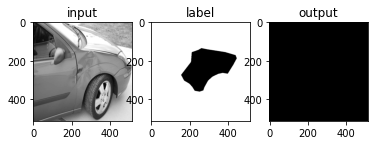

In [ ]:
id = 14

label = np.load(os.path.join(result_dir, lst_label[id]))
input = np.load(os.path.join(result_dir, lst_input[id]))
output = np.load(os.path.join(result_dir, lst_output[id]))

##
plt.subplot(131)
plt.imshow(input, cmap='gray')
plt.title('input')

plt.subplot(132)
plt.imshow(label, cmap='gray')
plt.title('label')

plt.subplot(133)
plt.imshow(output, cmap='gray')
plt.title('output')

plt.show()